In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os

import numpy as np
import pandas as pd
import atecml.data



In [2]:
train_df,test_df= atecml.data.load()
predictors = [x for x in train_df.columns if x not in atecml.data.NOT_FEATURE_COLUMNS]
target ='Fraud'

predictors.append('NaN_LIST')

In [3]:
#未标记前欺诈交易数据条数
len(train_df[train_df['Fraud'] ==1])

12122

In [4]:
reject_df = pd.read_pickle('./reject_inf.dat')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f685fc7d908>]],
      dtype=object)

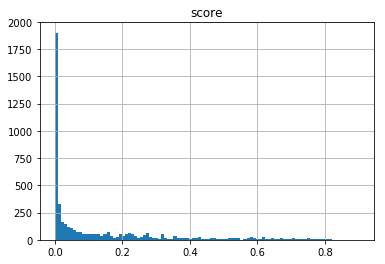

In [5]:
reject_df.hist(bins=100)

1622


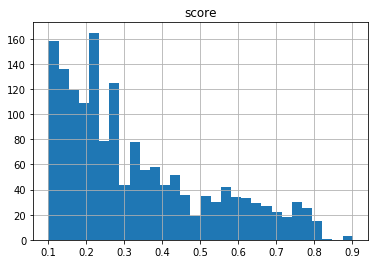

In [6]:
threshold = 0.1 # 大概未知交易中有20%是欺诈交易

filter_list = reject_df[reject_df.score > threshold]
filter_list.hist(bins=30)
reject_bad_list = list(filter_list['id'])
print(len(reject_bad_list))

In [7]:
train_df.loc[train_df['id'].isin(reject_bad_list),'Fraud'] = 1

In [8]:
#新的欺诈交易数量
len(train_df[train_df['Fraud'] ==1])

13744

In [9]:
train_df.to_pickle('./train.dat')